In [ ]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

#Import the libs

In [ ]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

#Upload the kaagle json file to download the data base

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mallikharjunaraos","key":"feea3c228d556fcdd1c9cad76572ed4b"}'}

#Root dir for google colab

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

#Download the database

In [ ]:
#!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research
#!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 98% 561M/572M [00:09<00:00, 61.3MB/s]
100% 572M/572M [00:09<00:00, 61.7MB/s]


# UnZip the content

In [ ]:
!unzip "/content/covid-cxr-image-dataset-research.zip"

Archive:  /content/covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-

# Additional libs import

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 
  

## Working with images 

In [ ]:
ROOT_DIR = "/content/COVID_IEEE/"
imgs = ['covid','normal','virus']

NEW_DIR = "/content/all_images/"

In [ ]:
# Copy all my images to a new folder i.e NEW_DIR

if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    print(org_dir)
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")


/content/COVID_IEEE/covid/
/content/COVID_IEEE/normal/
/content/COVID_IEEE/virus/



# Visualize the number of Images in each categories




In [ ]:
counter = {'covid':0,'normal':0,'virus':0}

for image in imgs:
  #for count in glob.iglob(os.path.join(ROOT_DIR,image, "/")):
  for count in glob.iglob(ROOT_DIR+image+"/"+"*"):
    counter[image] += 1

counter

{'covid': 536, 'normal': 668, 'virus': 619}

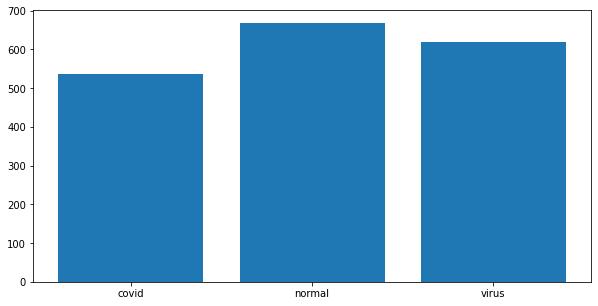

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [ ]:
print(counter["covid"])

536


In [ ]:
#glob.glob(NEW_DIR+imgs[0]+"*")

(ROOT_DIR+imgs[2]+"/"+"*")

'/content/COVID_IEEE/virus/*'

# Train and test split for 3 categories

In [ ]:
#Creating the folder

if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/normal")
  os.makedirs(NEW_DIR+"train_test_split/train/covid")
  os.makedirs(NEW_DIR+"train_test_split/train/virus")

  os.makedirs(NEW_DIR+"train_test_split/test/normal")
  os.makedirs(NEW_DIR+"train_test_split/test/covid")
  os.makedirs(NEW_DIR+"train_test_split/test/virus")

  os.makedirs(NEW_DIR+"train_test_split/validation/normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/covid")
  os.makedirs(NEW_DIR+"train_test_split/validation/virus")


  # Train Data
  for i in np.random.choice(replace= False , size= int(counter["covid"]*0.7) , a = glob.glob(ROOT_DIR+imgs[0]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= int(counter["normal"]*0.7) , a = glob.glob(ROOT_DIR+imgs[1]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= int(counter["virus"]*0.7) , a = glob.glob(ROOT_DIR+imgs[2]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/virus" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= int(counter["covid"]*0.15) , a = glob.glob(ROOT_DIR+imgs[0]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= int(counter["normal"]*0.15) , a = glob.glob(ROOT_DIR+imgs[1]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= int(counter["virus"]*0.15) , a = glob.glob(ROOT_DIR+imgs[2]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/virus" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= int(counter["covid"]*0.15) , a = glob.glob(ROOT_DIR+imgs[0]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= int(counter["normal"]*0.15) , a = glob.glob(ROOT_DIR+imgs[1]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= int(counter["virus"]*0.15) , a = glob.glob(ROOT_DIR+imgs[2]+"/"+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/virus" )
    os.remove(i)

 



In [ ]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"

# Building the neural network

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 1198 images belonging to 3 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 255 images belonging to 3 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 251 images belonging to 3 classes.


# Class indicators

In [ ]:
train.class_indices

{'covid': 0, 'normal': 1, 'virus': 2}

In [ ]:
class_type = {0:'Covid',  1 : 'Normal', 2: 'Virus'}

In [ ]:
t_img , label = train.next()

# Class indicators

In [ ]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

# ploting the images of x rays

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


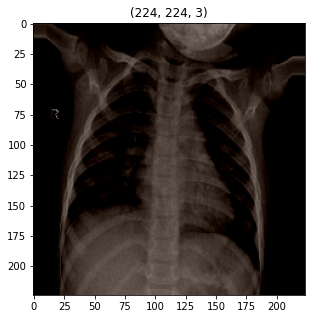

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


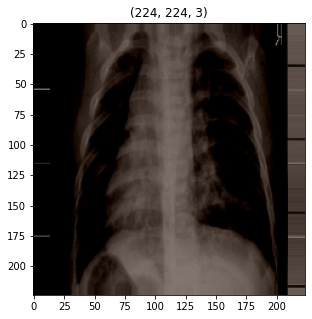

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


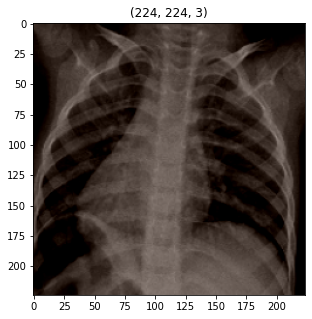

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


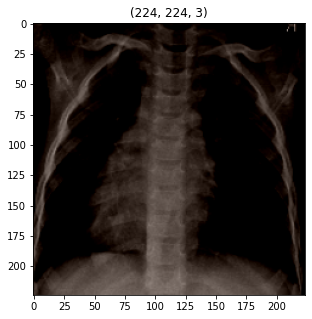

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


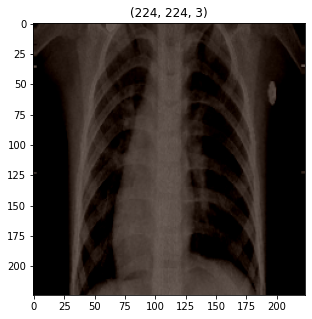

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


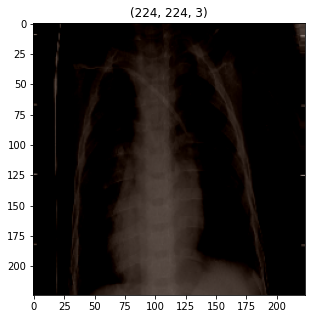

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


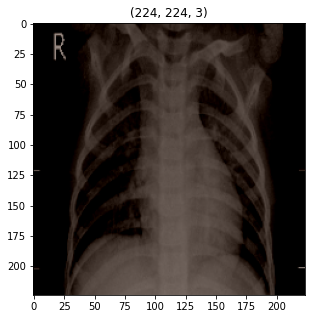

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


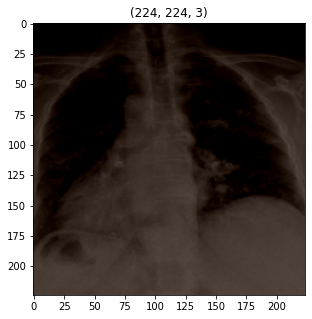

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


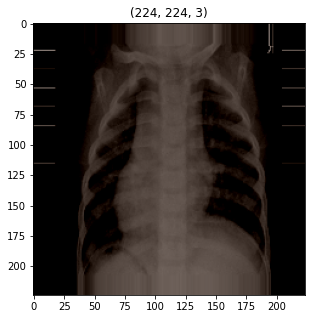

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


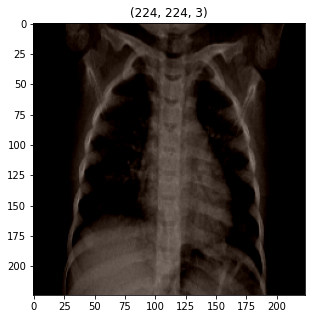

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


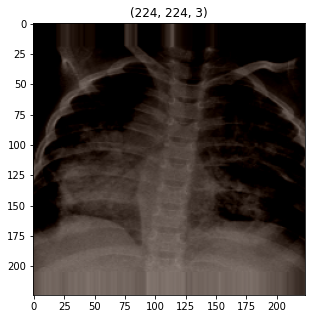

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


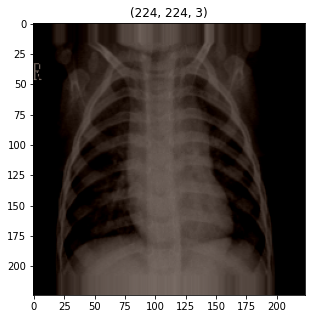

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


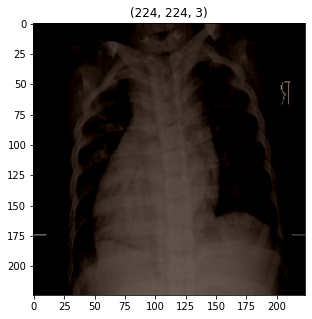

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


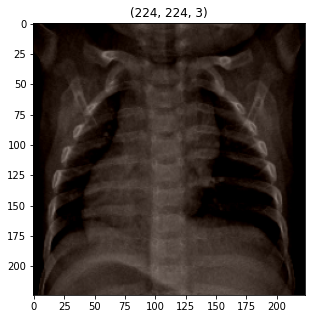

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


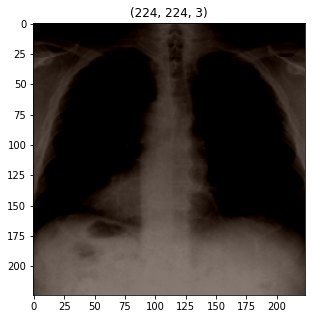

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


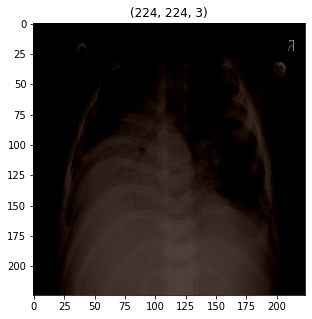

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


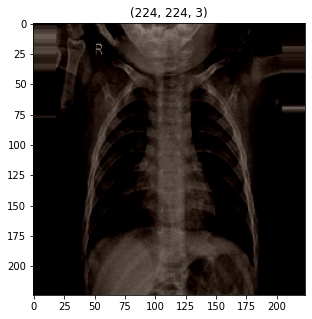

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


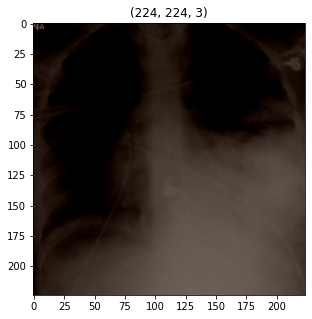

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


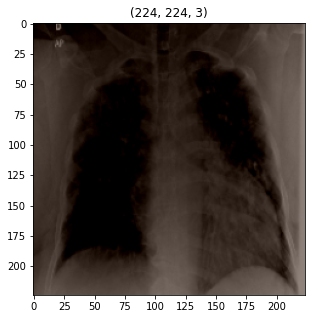

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


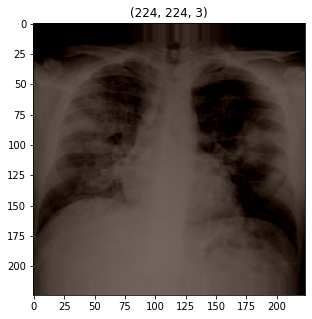

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


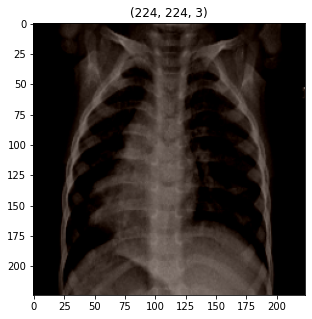

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


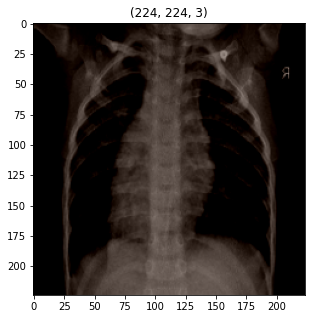

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


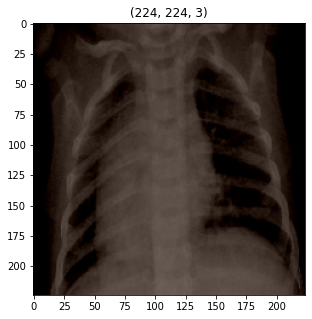

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


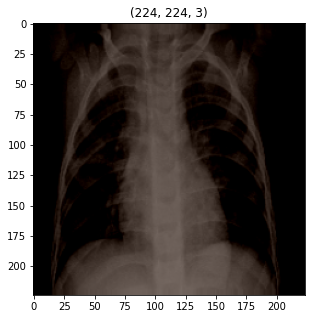

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


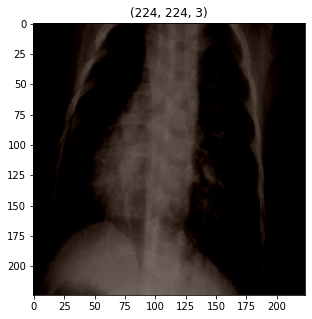

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


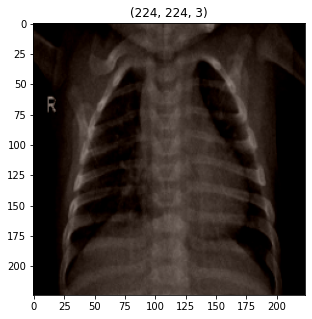

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


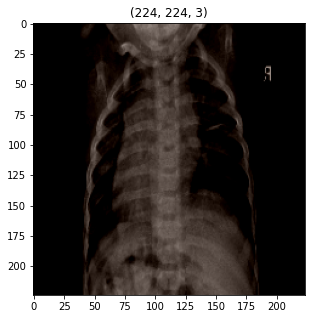

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


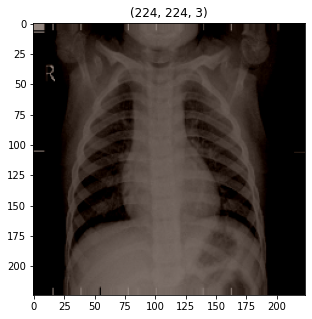

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


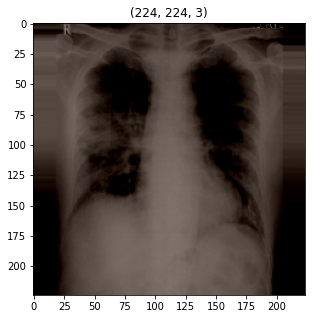

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


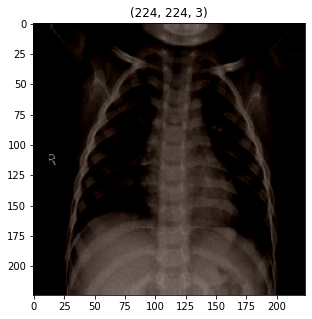

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


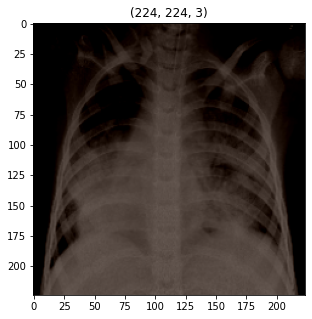

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


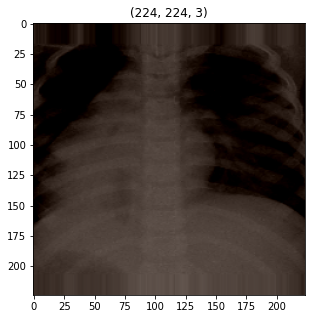

In [ ]:
plotImages(t_img, label)

In [ ]:
##we will be using our model vgg16 

# Model Arechitecture: VGG 16 

## VGG-16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. ... It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture.

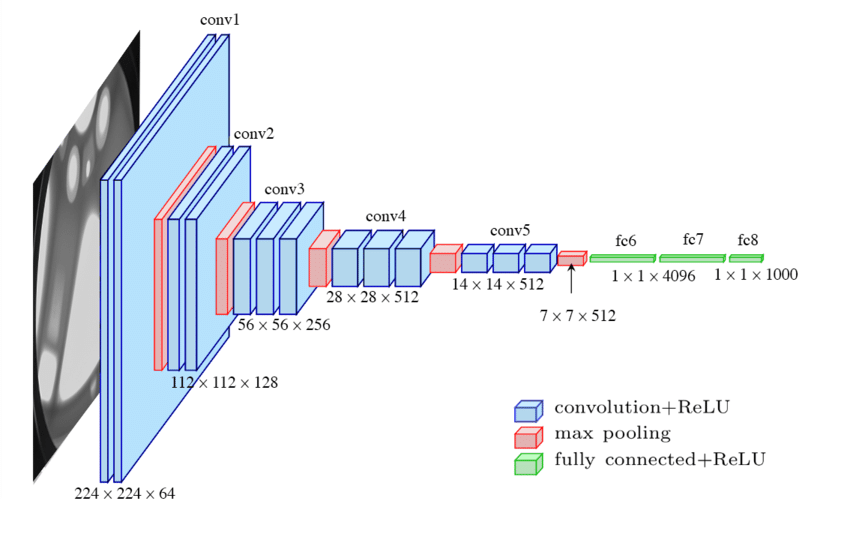

# Implementing VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(units=3 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# implementing early stopping and model check point 

In [ ]:


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
#hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 8, validation_data= valid , validation_steps= 32)
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.8827 - accuracy: 0.6250 WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 32 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.85098, saving model to bestmodel.h5
10/10 [==============================] - 273s 28s/step - loss: 0.8827 - accuracy: 0.6250 - val_loss: 0.4102 - val_accuracy: 0.8510
Epoch 2/30
10/10 [==============================] - 141s 14s/step - loss: 0.3061 - accuracy: 0.9073
Epoch 3/30
10/10 [==============================] - 148s 15s/step - loss: 0.2511 - accuracy: 0.9125
Epoch 4/30
10/10 [==============================] - 148s 15s/step - loss: 0.2091 - accuracy: 0.9125
Epoch 5/30
10/10 [==============================] - 140s 14s/step - loss: 0.2308 - accuracy: 0.9205
Epoch 6/30
10/10 [====

In [ ]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

# Plotting the performance values

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

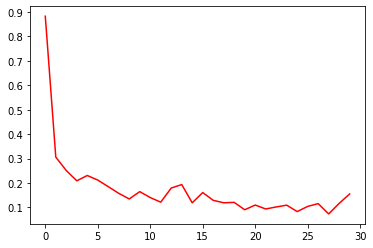

In [ ]:
plt.plot(h['loss'] , c = "red")

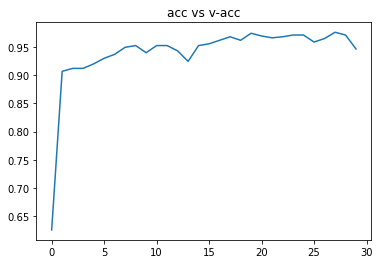

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

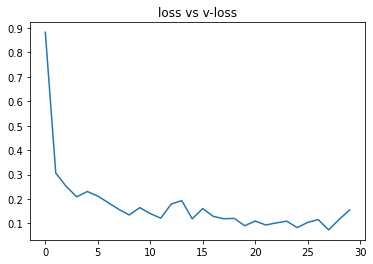

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.8486055731773376 %


In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 86.9803786277771 percent

The chances of image being Normal is : 11.077967286109924 percent


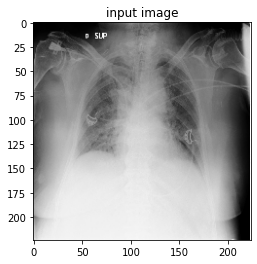

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/all_images/CASE24_XRAY_1.jpg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

## Grad CAM Visualization 

In [ ]:
import tensorflow as tf

In [ ]:
# this function is udes to generate the heat map of aan image


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [ ]:
# put the heatmap to our image to understand the area of interest

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))




In [ ]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

The given X-Ray image is of type = Normal

The chances of image being Covid is : 10.158702731132507 %
The chances of image being Normal is : 72.24560976028442 %

image with heatmap representing the covid spot


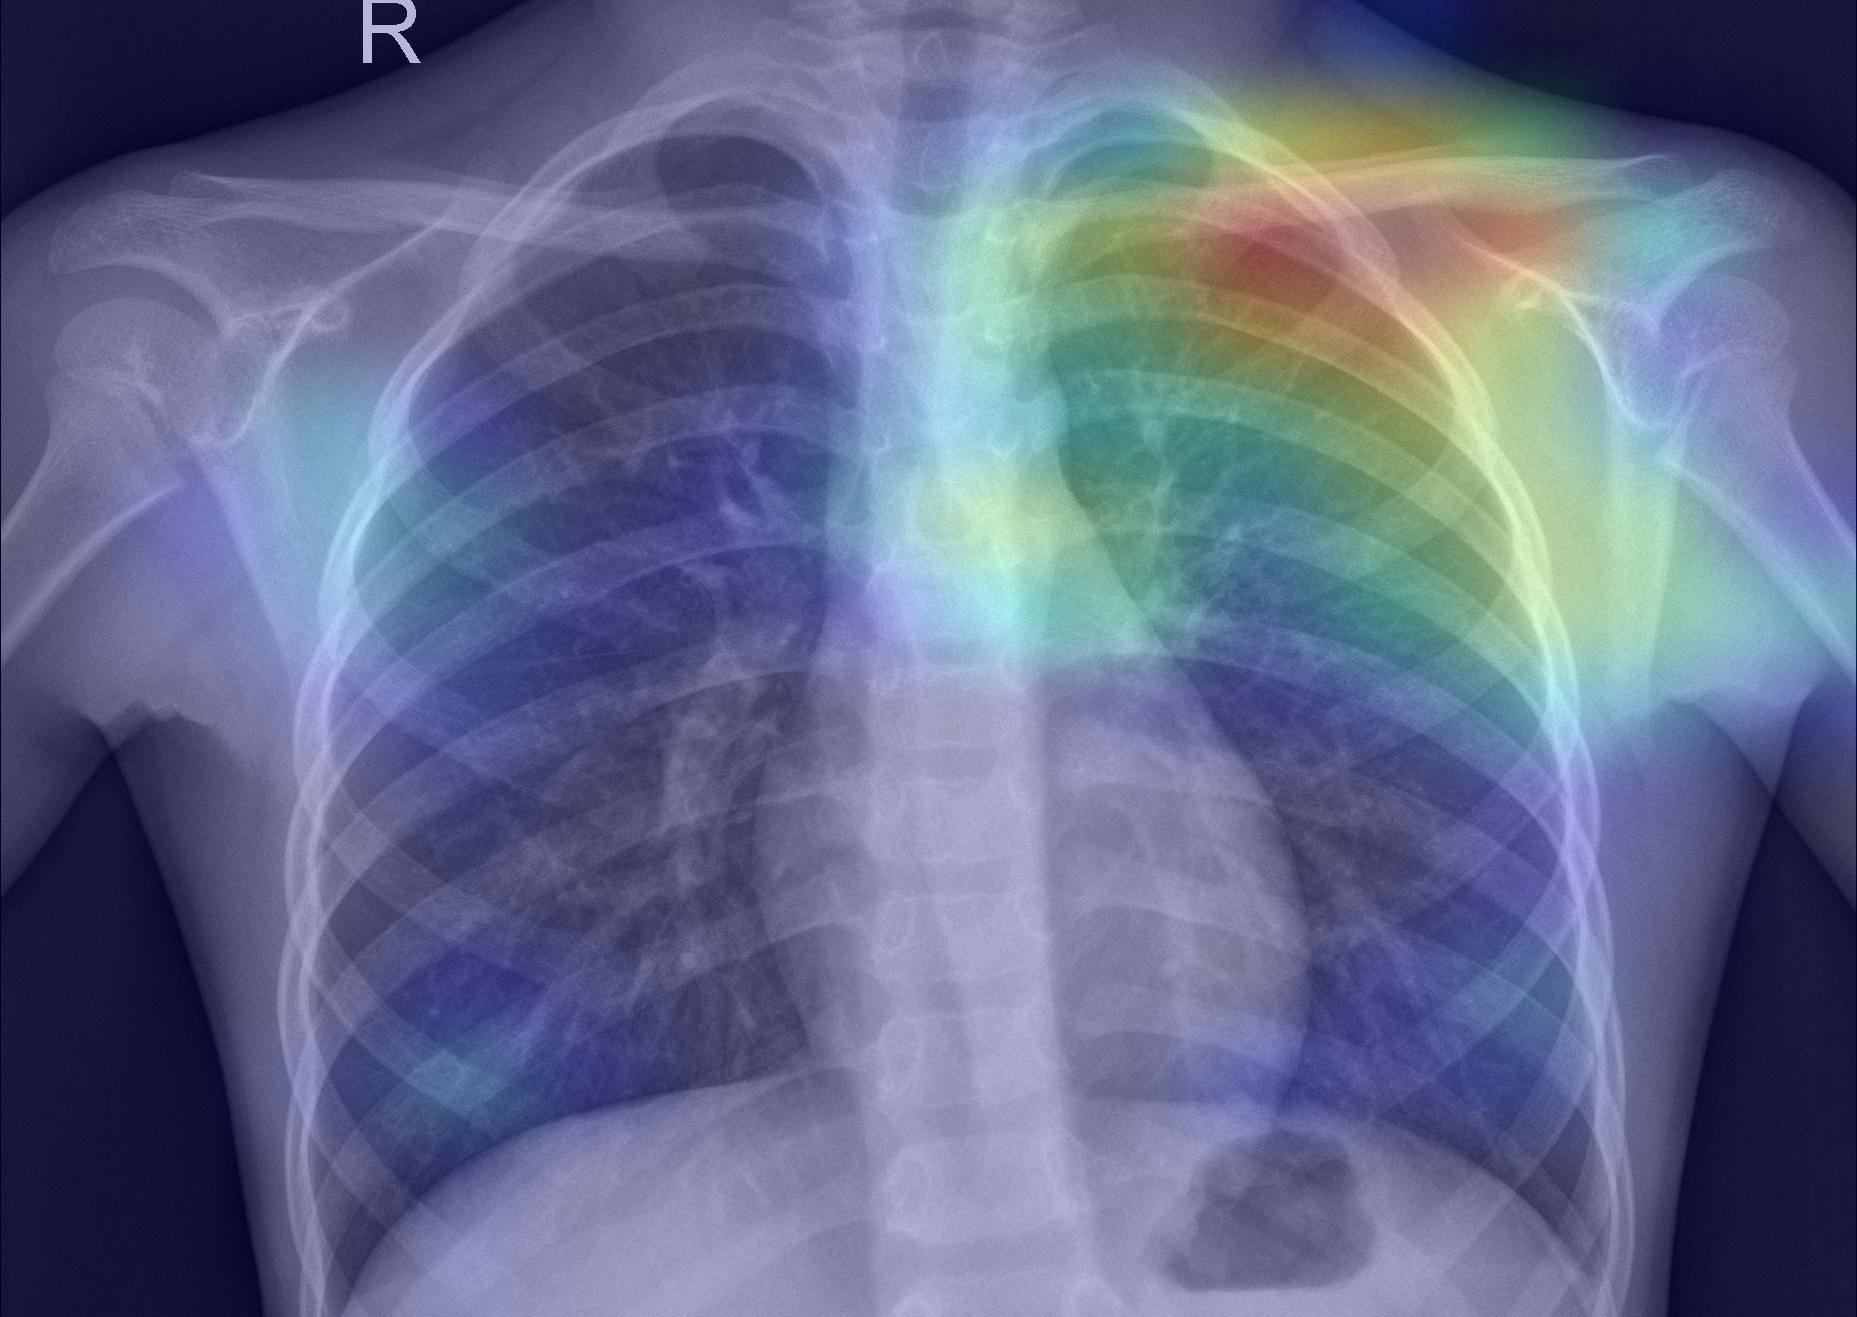


the original input image



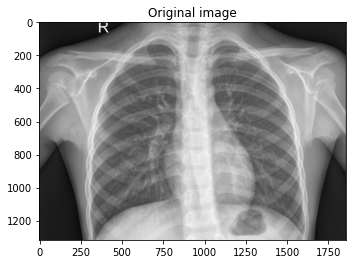

In [ ]:
#predictions
# provide the path of any image from google or any other scource 
# the path is already defigned above , but you can also provide the path here to avoid scrolling up 

# for covid image : 
path = "/content/all_images/IM-0001-0001.jpeg"

image_prediction_and_visualization(path)

The given X-Ray image is of type = Normal

The chances of image being Covid is : 8.860567212104797 %
The chances of image being Normal is : 71.12724781036377 %

image with heatmap representing the covid spot


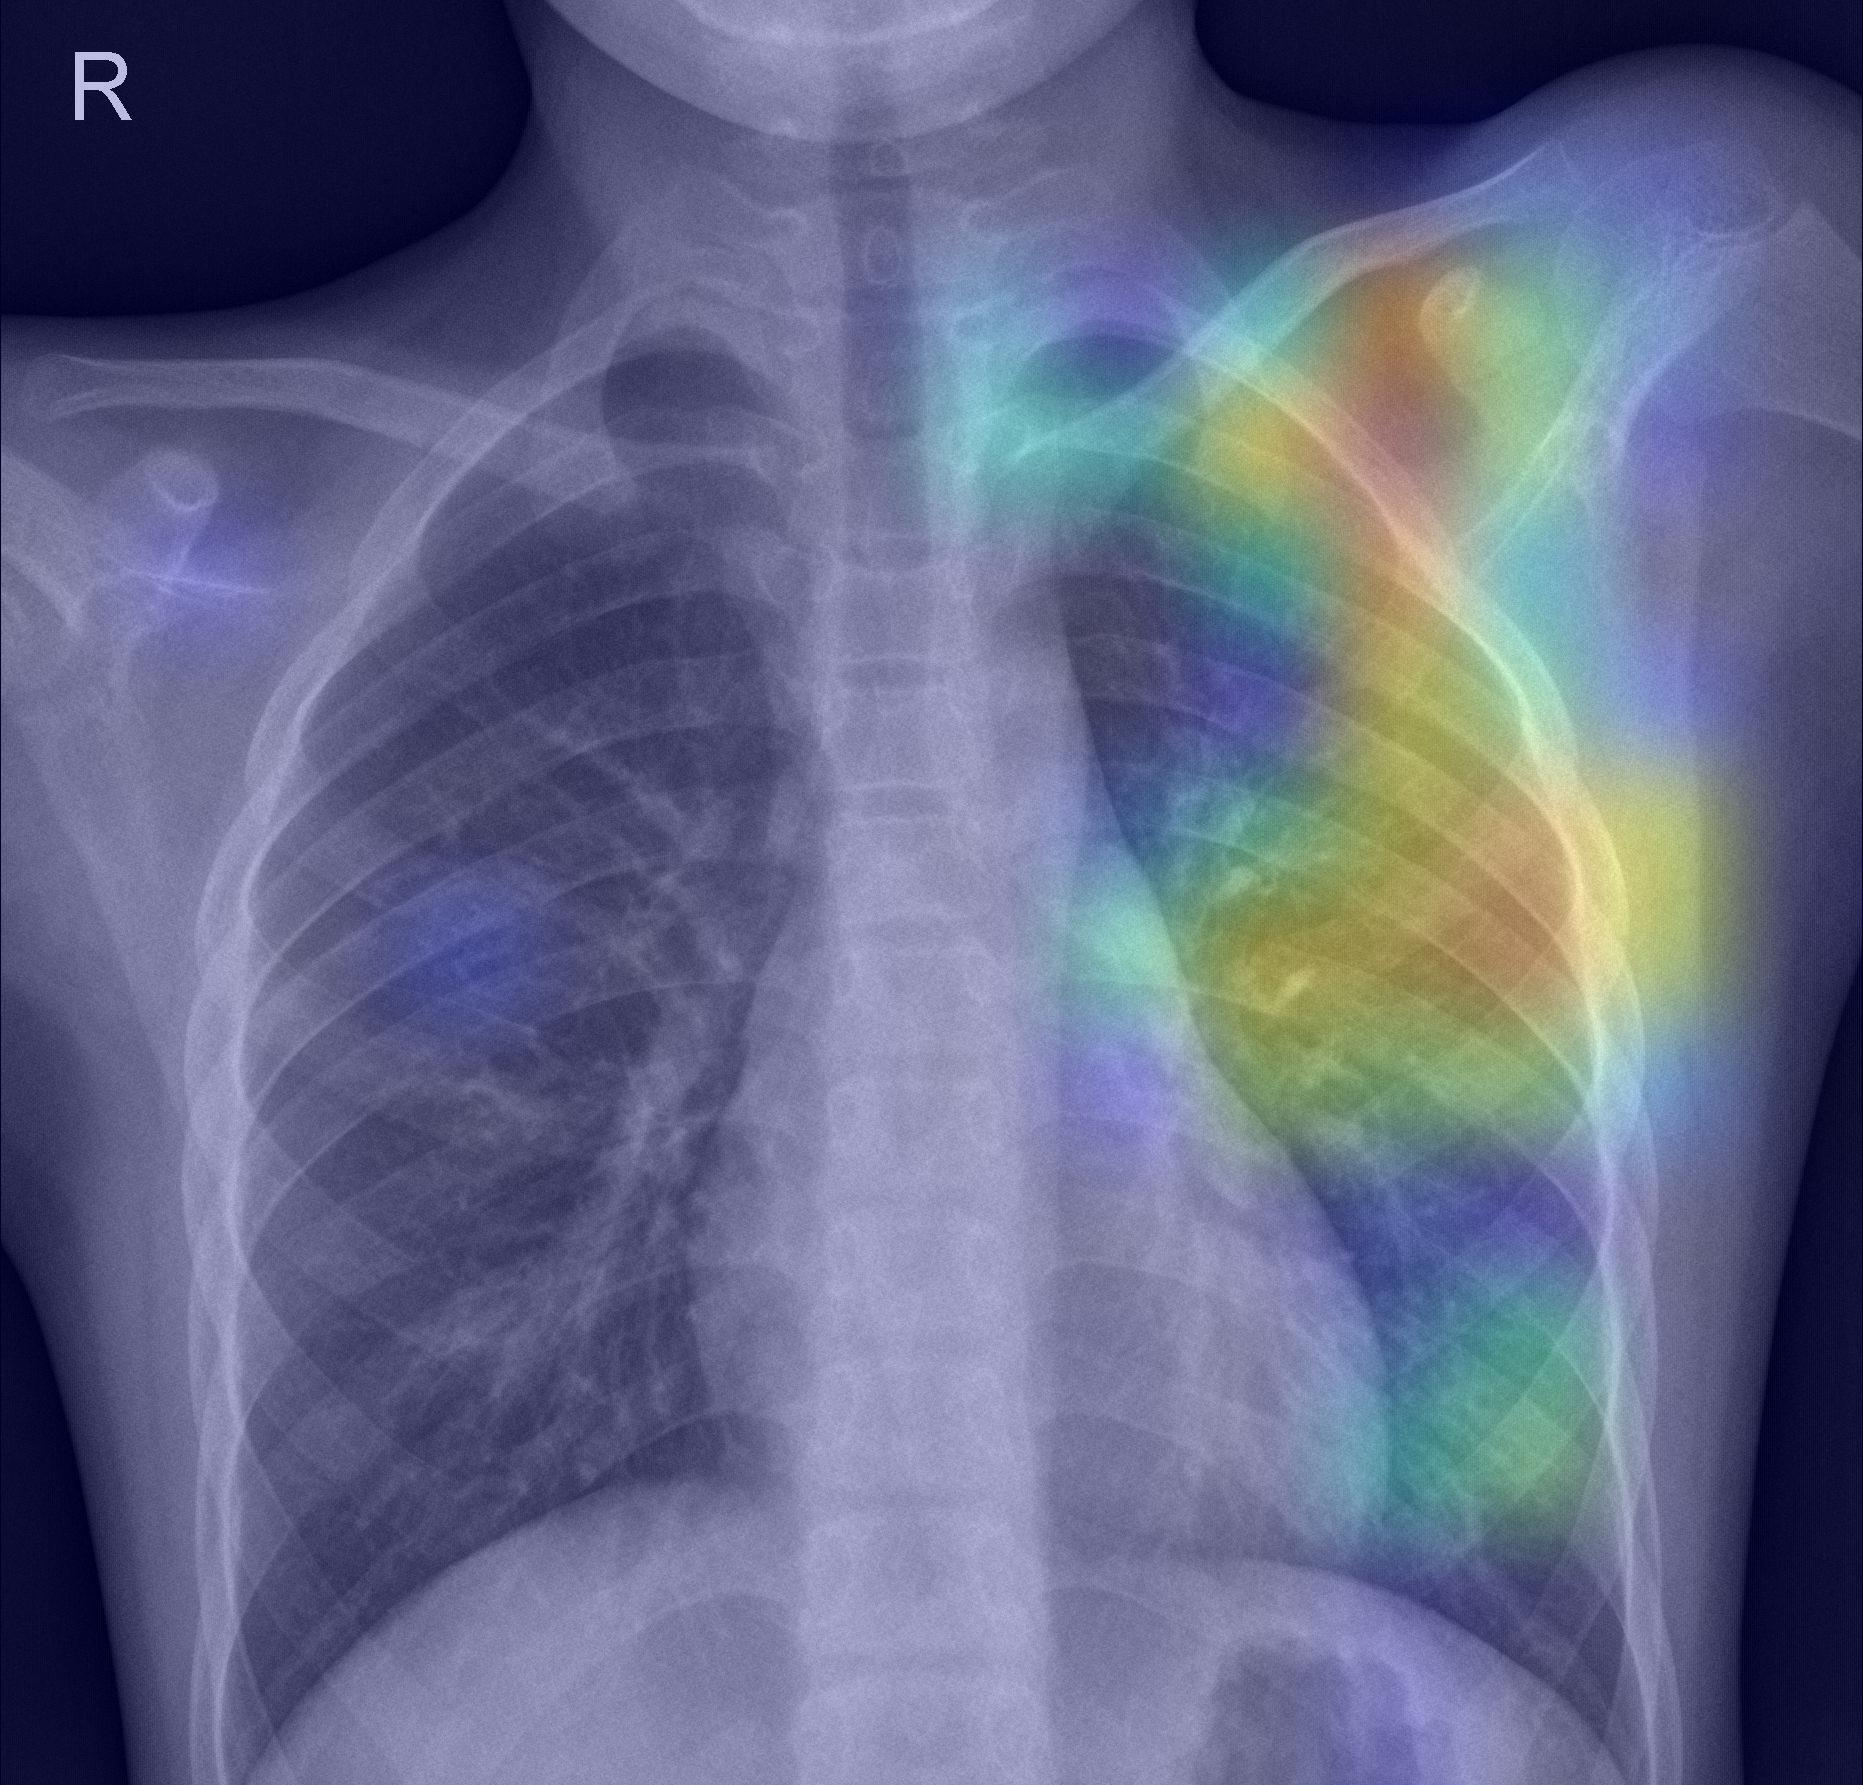


the original input image



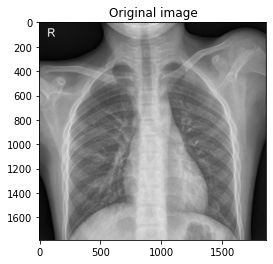

In [ ]:
# for normal image : 
path = "/content/all_images/train_test_split/test/normal/IM-0011-0001.jpeg"

image_prediction_and_visualization(path)